In [1]:
import sklearn; 
print(sklearn.__version__)

C:\Users\larsw\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


0.19.1


In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### Question 1

In [3]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
student_data = pd.read_csv(data_path, delimiter = ',')

In [4]:
student_data.head(5)

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [5]:
student_data.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [6]:
len(student_data)

50

In [7]:
X = student_data.drop(columns="exam_score")
Phi = np.c_[np.ones((len(X), 1)), X]
y = student_data["exam_score"]

In [8]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=False)
lreg.fit(Phi, y)
lreg.coef_

array([17.89768026,  1.44114091])

In [9]:
print(17.8977 + 10*1.4411)
lreg.predict(np.array([1, 10]).reshape(1,-1))

32.3087


array([32.30908931])

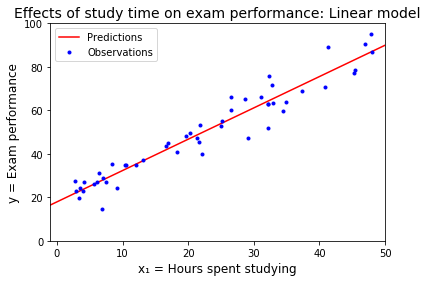

In [10]:
X_coords = np.linspace(-1, 50)
Phi_coords = np.c_[np.ones((len(X_coords), 1)), X_coords]
pred, = plt.plot(X_coords, lreg.predict(Phi_coords), "r-")
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
pred.set_label("Predictions")
plt.legend()
plt.axis([-1, 50, 0, 100])
plt.xlabel("x\N{SUBSCRIPT ONE} = Hours spent studying", fontsize=12)
plt.ylabel("y = Exam performance", fontsize=12)
plt.title("Effects of study time on exam performance: Linear model", fontsize=14)
plt.show()

In [11]:
# Phi is our nx2 design matrix, y our nx1 target vector
gramian_matrix_of_phi = np.dot(Phi.T, Phi)
inverse_of_gramian    = np.linalg.inv(gramian_matrix_of_phi)
pseudo_inverse_of_phi = np.dot(inverse_of_gramian, Phi.T)
estimated_weights     = np.dot(pseudo_inverse_of_phi, y)
estimated_weights

array([17.89768026,  1.44114091])

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, lreg.predict(Phi))

30.9854726145413

In [13]:
def mse(Phi, weights):
    squared_error_sum = 0
    for i in range(len(Phi)):
        yi_pred = sum(Phi[i] * weights)
        squared_error_sum += (yi_pred - y[i])**2
    return 1/len(Phi) * squared_error_sum
mse(Phi,estimated_weights)

30.985472614541287

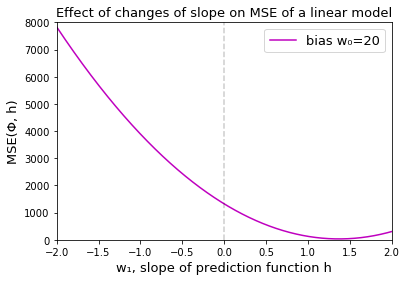

1.3726745349069813


In [14]:
w0 = 20
w1 = np.linspace(-2, 2, 5000)
error, = plt.plot(w1, [mse(Phi, [w0, w1[i]]) for i in range(5000)], "m-")
error.set_label("bias w\N{SUBSCRIPT ZERO}=20")
plt.plot([0, 0], [0, 8000], "k--", alpha=0.2)
plt.axis([-2, 2, 0, 8000])
plt.xlabel("w\N{SUBSCRIPT ONE}, slope of prediction function h", fontsize=13)
plt.ylabel("MSE(\N{GREEK CAPITAL LETTER PHI}, h)", fontsize=13)
plt.title("Effect of changes of slope on MSE of a linear model", fontsize=13)
plt.legend(fontsize=13)
plt.show()
print(w1[np.argmin([mse(Phi, [w0, w1[i]]) for i in range(5000)])])

### Question 2

In [15]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
reg_data = pd.read_csv(data_path, delimiter = ',')

In [16]:
reg_data.head(5)

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [17]:
reg_data.describe()

,input,output
count,25.000000,25.00000
mean,0.817480,5.90728
std,3.277051,12.43568
min,-4.826000,-15.57700
25%,-2.588000,-1.46500
50%,2.633000,6.92900
75%,3.276000,11.38200
max,4.875000,32.97600


In [18]:
X = reg_data.drop(columns=["output"])
y = reg_data["output"]

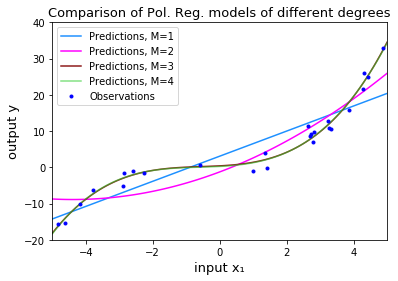

In [19]:
from sklearn.preprocessing import PolynomialFeatures 

models = []
Phi_polys = []
colours = ["dodgerblue", "fuchsia", "maroon", "limegreen"] 
alphas = [1, 1, 0.9, 0.6]

for M in range(1,5):
    poly_features = PolynomialFeatures(degree=M, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    Phi_poly = np.c_[np.ones((len(X_poly), 1)), X_poly]
    Phi_polys.append(Phi_poly)
    
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(Phi_poly, y)
    models.append(lin_reg)
    
    X_coords = np.linspace(-5, 5, 100)
    X_coords_poly = poly_features.transform(np.array(X_coords).reshape(-1, 1))
    Phi_coords_poly = np.c_[np.ones((len(X_coords_poly), 1)), X_coords_poly]
    y_predict = lin_reg.predict(Phi_coords_poly)
    
    pred, = plt.plot(X_coords, y_predict, colours[M-1], alpha=alphas[M-1])
    pred.set_label("Predictions, M=" + str(M))
    
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
plt.legend()
plt.axis([-5, 5, -20, 40])
plt.xlabel("input x\N{SUBSCRIPT ONE}", fontsize=13)
plt.ylabel("output y", fontsize=13)
plt.title("Comparison of Pol. Reg. models of different degrees", fontsize=13)
plt.show()

In [20]:
errors = [mean_squared_error(y, models[i].predict(Phi_polys[i])) for i in range(len(models))]
errors

[24.744378032672856,
 17.352926937873296,
 2.7447567192524276,
 2.7389111790755383]

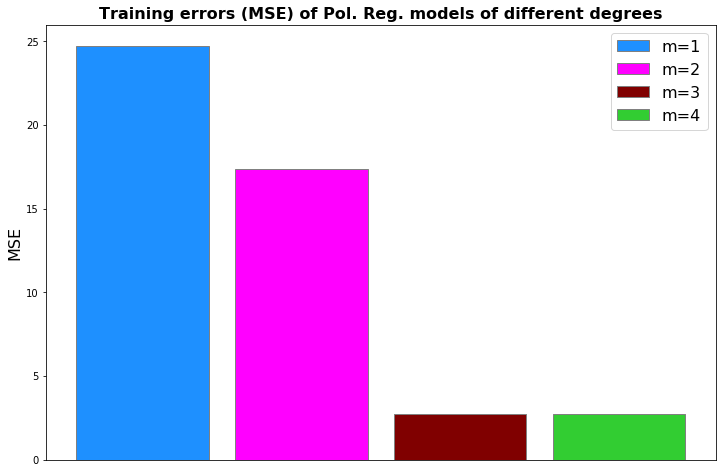

In [21]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# set height of bar 
heights = [[error] for error in errors]
   
# Set position of bar on X axis 
brs = [0, 0.3, 0.6, 0.9]
   
# Make the plot 
for i in range(len(models)):
    plt.bar(brs[i], heights[i], color =colours[i], width = barWidth, 
        edgecolor ='grey', label ="m=" + str(i+1)) 
    
plt.ylabel('MSE', fontsize=16) 
plt.xticks([]) 
plt.legend(prop={'size': 16})
plt.title("Training errors (MSE) of Pol. Reg. models of different degrees", fontsize=16, fontweight="bold")
plt.show() 

In [78]:
def single_rbf(x, c, alpha):
    return np.exp((-1/2) * (x-c)**2 / alpha**2)

def group_rbf(x, alpha):
    return [1, single_rbf(x, -4.0, alpha), single_rbf(x, -2.0, alpha),
            single_rbf(x, 2.0, alpha), single_rbf(x, 4.0, alpha)]

[1, 8.58716646651046e-90, 1.495289916360948e-23, 2.334166753175526e-21, 2.0924872986388428e-85]

[1, 0.999180006820097, 0.9997897935483654, 0.9998099915259917, 0.9992203785450484]

[1, 0.9999917967380648, 0.9999978977167288, 0.9999980997365264, 0.9999922007752361]



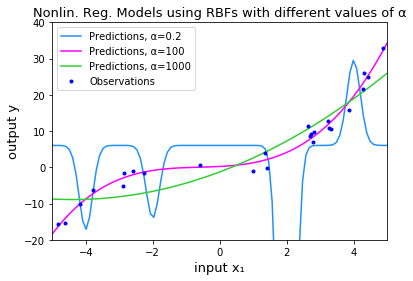

In [128]:
alphas = [0.2, 100, 1000]
models = []
colours = ["dodgerblue", "fuchsia", "limegreen"]

for i in range(len(alphas)):
    alpha = alphas[i]
    X_rbf = [group_rbf(x, alpha) for x in X.values]
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(X_rbf, y)
    models.append(lin_reg)
    
    X_coords = np.linspace(-5, 5, 100)
    X_coords_rbf = [group_rbf(x, alpha) for x in X_coords]
    y_predict = lin_reg.predict(X_coords_rbf)
    
    print(X_coords_rbf[50])
    print()
    
    pred, = plt.plot(X_coords, y_predict, colours[i])
    pred.set_label("Predictions, \N{GREEK SMALL LETTER ALPHA}=" + str(alpha))
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
plt.legend()
plt.axis([-5, 5, -20, 40])
plt.xlabel("input x\N{SUBSCRIPT ONE}", fontsize=13)
plt.ylabel("output y", fontsize=13)
plt.title("Nonlin. Reg. Models using RBFs with different values of \N{GREEK SMALL LETTER ALPHA}", fontsize=13)
plt.show()

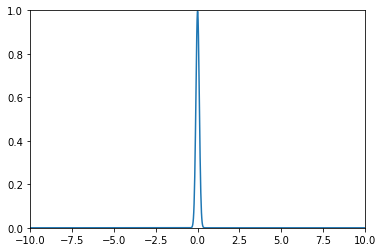

In [100]:
xs = np.linspace(-10, 10, 1000)
ys = [single_rbf(x, 0, 0.1) for x in xs]
plt.axis([-10, 10, 0, 1])
plt.plot(xs, ys)

### Question 4